In [1]:
# transistor parameters

vth = 0.4 # V
uncox = 170e-6 # A/V^2
lambdan = 0.18 # 1/V
cgs_w_l130nm = 1.19*1e-15/1e-6 # F/m
cgd_w_l130nm = 0.65*1e-15/1e-6 # F/m
cdb_w = 0.31*1e-15/1e-6 # F/m
csb_w = 0.4*1e-15/1e-6 # F/m
cov_w = 300/500*1e-15/1e-6 # F/m

In [5]:
# cap bank modeling

# unit row
# ****************************************

import numpy as np
import matplotlib.pyplot as plt

# inputs
# ****************************
Ls = 47e-9
Rs = 0.419
f_sr = 1870e6
q_ind = 296 #q_coil @ fosc
f_center = 403e6
n = 4
# ****************************

# initial values of Msw
widthn = np.array([0.5e-6,1e-6,5e-6,10e-6,20e-6,50e-6]) # m
lengthn = 0.13e-6 # m
vgs = 1.2 # V

cgs = cgs_w_l130nm*widthn
cgd = cgd_w_l130nm*widthn
cdb = cdb_w*widthn
csb = csb_w*widthn
cov = cov_w*widthn

c1off = 2*(cdb + csb + 2*cov)/2
c1on = 2*(cdb + csb + cgd + cgs)/2

Ron = 1/(uncox*(widthn/lengthn)*(vgs-vth))
Ron = 1.5*Ron

# unit cap = cb
pi_value = 3.14159

c_par = 1/(Ls * (2*pi_value*f_sr)**2)

Rp_ind = Rs*(1+q_ind**2)
f_ul = 1.1*f_center
f_step = (f_ul-f_center)/(2**(n-1))
c_res = 1/((2*pi_value*f_center)**2 * Ls)
print('c_res = ' + str(c_res))
cb = 2*(1/((2*pi_value*(f_center-f_step))**2 * Ls) - c_res)
print('cb = ' + str(cb))
c_ext = 1/((2*pi_value*f_ul)**2 * Ls)
print('c_ext = ' + str(c_ext))
print('c1off = ' + str(c1off))

Cs_cap = c1on * (1 + (2*pi_value*f_center*Ron*c1on)**2)/((2*pi_value*f_center*Ron*c1on)**2)
Rs_cap = Ron / (1+(2*pi_value*f_center*Ron*c1on)**2)

Rp_cap = 1/((Rs_cap)*(2*pi_value*f_center*cb)**2)
Rp_cap_total = (2*Rp_cap)/(2**n - 1)

print('c_par = ' + str(c_par))
print('q_ind = ' + str(q_ind))
print('Rp_ind = ' + str(Rp_ind))
print('Cs_cap = ' + str(Cs_cap))
print('Rs_cap = ' + str(Rs_cap))
print('Ron = ' + str(Ron))


c_res = 3.3184329478923847e-12
cb = 1.6908535129462953e-13
c_ext = 2.7425065685061025e-12
c1off = [9.55e-16 1.91e-15 9.55e-15 1.91e-14 3.82e-14 9.55e-14]
c_par = 1.54120328472148e-13
q_ind = 296
Rp_ind = 36711.523
Cs_cap = [1.48766979e-11 2.97533959e-11 1.48766979e-10 2.97533959e-10
 5.95067918e-10 1.48766979e-09]
Rs_cap = [2867.40128856 1433.70064428  286.74012886  143.37006443   71.68503221
   28.67401289]
Ron = [2867.64705882 1433.82352941  286.76470588  143.38235294   71.69117647
   28.67647059]


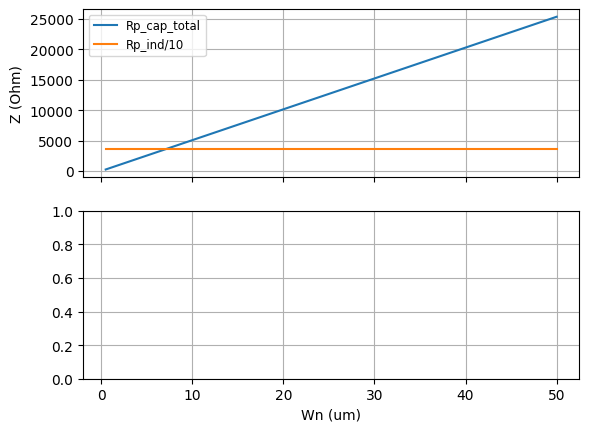

In [6]:
# ID vs VDS
fig, axs = plt.subplots(2,1,sharex='col')

#axs[0].set_title('sg13_lv_nmos (L=0.5um, VGS=0.75V)')
axs[0].plot(widthn*1e6, Rp_cap_total, label='Rp_cap_total')
axs[0].plot(widthn*1e6, Rp_ind*np.array([1,1,1,1,1,1])/10, label='Rp_ind/10')
axs[0].set_ylabel('Z (Ohm)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].set_xlabel('Wn (um)')
axs[1].grid()

plt.show()

In [7]:
# output W
widthn_val = np.interp(Rp_ind/10,Rp_cap_total,widthn)
print('widthn_val = ' + str(widthn_val))
print('cb = ' + str(cb))
print('c_ext = ' + str(c_ext))


widthn_val = 7.236077494108565e-06
cb = 1.6908535129462953e-13
c_ext = 2.7425065685061025e-12
